In [1]:
# Importing the dependencies

import pandas as pd
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import scipy
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 2000

In [2]:
# Creating a function to make a DataFrame from csv files

def csv_to_dataframe(path,column_name):
    df = pd.read_csv(path)
    df = df[["DateTime","Value"]]
    df["Year"] = pd.DatetimeIndex(df["DateTime"]).year
    df["Month"] = pd.DatetimeIndex(df["DateTime"]).month
    df.rename(columns = {'Value':column_name}, inplace = True)
    del df["DateTime"]
    df = df[["Year","Month",column_name]]
    return df

In [3]:
# Reading csv files

inflation_data = pd.read_csv("Resources\inflation.csv")
cpi_food = pd.read_csv("Resources\cpi_u_food_by_year_unseasoned.csv")
minimum_wage = pd.read_csv("Resources\EPI Data Library - Minimum wage changeable.csv")
Inflation_rate = pd.read_csv("Resources/Inflation_rate_2022.csv")
Mortage_rate = pd.read_csv("Resources/historical_country_United_States_indicator_30_Year_Mortgage_Rate.csv")
Mortage_size = pd.read_csv("Resources/historical_country_United_States_indicator_Average_Mortgage_Size.csv")
Average_House_price = pd.read_csv("Resources/historical_country_United_States_indicator_House_Price_Index_YoY.csv")
New_Home_sales = pd.read_csv("Resources/historical_country_United_States_indicator_New_Home_Sales.csv")
Buy_to_Rent_Ratio = pd.read_csv("Resources/historical_country_United_States_indicator_Price_to_Rent_Ratio.csv")
Dataset = pd.read_csv("Resources/General_Dataset.csv")
Fed_Interest_Rate = pd.read_csv("Resources/Fed_Interest_rate.csv")
Inflation_erik = pd.read_csv("Resources/inflation.csv")
Consumer_Spending = csv_to_dataframe("Resources/historical_country_United_States_indicator_Consumer_Spending.csv","Consumer_Spending")
Personal_Income = csv_to_dataframe("Resources/historical_country_United_States_indicator_Personal_Income.csv","Personal_Income")
Personal_Savings = csv_to_dataframe("Resources/historical_country_United_States_indicator_Personal_Savings.csv","Personal_Savings")
Personal_Spending = csv_to_dataframe("Resources/historical_country_United_States_indicator_Personal_Spending.csv","Personal_Spending")
Youth_Unemployment_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Youth_Unemployment_Rate.csv","Youth_Unemployment_Rate")
Wages_in_Manufacturing = csv_to_dataframe("Resources/historical_country_United_States_indicator_Wages_in_Manufacturing.csv","Wages_in_Manufacturing")
Wages = csv_to_dataframe("Resources/historical_country_United_States_indicator_Wages.csv","Wages")
Wage_Growth = csv_to_dataframe("Resources/historical_country_United_States_indicator_Wage_Growth.csv","Wage_Growth")
Unemployment_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Unemployment_Rate.csv","Unemployment_Rate")
Unemployed_Persons = csv_to_dataframe("Resources/historical_country_United_States_indicator_Unemployed_Persons.csv","Unemployed_Persons")
Productivity = csv_to_dataframe("Resources/historical_country_United_States_indicator_Productivity.csv","Productivity")
Population = csv_to_dataframe("Resources/historical_country_United_States_indicator_Population.csv","Population")
Part_Time_Employment = csv_to_dataframe("Resources/historical_country_United_States_indicator_Part_Time_Employment.csv","Part_Time_Employment")
Nonfarm_Payrolls_Private = csv_to_dataframe("Resources/historical_country_United_States_indicator_Nonfarm_Payrolls_Private.csv","Nonfarm_Payrolls_Private")
Manufacturing_Payrolls = csv_to_dataframe("Resources/historical_country_United_States_indicator_Manufacturing_Payrolls.csv","Manufacturing_Payrolls")
Long_Term_Unemployment_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Long_Term_Unemployment_Rate.csv","Long_Term_Unemployment_Rate")
Labour_Costs = csv_to_dataframe("Resources/historical_country_United_States_indicator_Labour_Costs.csv","Labour_Costs")
Job_Vacancies = csv_to_dataframe("Resources/historical_country_United_States_indicator_Job_Vacancies.csv","Job_Vacancies")
Job_Quits_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Job_Quits_Rate.csv","Job_Quits_Rate")
Job_Quits = csv_to_dataframe("Resources/historical_country_United_States_indicator_Job_Quits.csv","Job_Quits")
Job_Offers = csv_to_dataframe("Resources/historical_country_United_States_indicator_Job_Offers.csv","Job_Offers")
Government_Payrolls = csv_to_dataframe("Resources/historical_country_United_States_indicator_Government_Payrolls.csv","Government_Payrolls")
Full_Time_Employment = csv_to_dataframe("Resources/historical_country_United_States_indicator_Full_Time_Employment.csv","Full_Time_Employment")
Employment_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Employment_Rate.csv","Employment_Rate")
Employment_Cost_Index = csv_to_dataframe("Resources/historical_country_United_States_indicator_Employment_Cost_Index.csv",'Employment_Cost_Index')
Employed_Persons = csv_to_dataframe("Resources/historical_country_United_States_indicator_Employed_Persons.csv","Employed_Persons")
Bankruptcies = csv_to_dataframe("Resources/historical_country_United_States_indicator_Bankruptcies.csv","Bankruptcies")
Average_Weekly_Hours = csv_to_dataframe("Resources/historical_country_United_States_indicator_Average_Weekly_Hours.csv","Average_Weekly_Hours")
Average_Hourly_Earnings = csv_to_dataframe("Resources/historical_country_United_States_indicator_Average_Hourly_Earnings.csv","Average_Hourly_Earnings")
ADP_Employment_Change = csv_to_dataframe("Resources/historical_country_United_States_indicator_ADP_Employment_Change.csv","ADP_Employment_Change")
Minimum_Wages = csv_to_dataframe("Resources/historical_country_United_States_indicator_Minimum_Wages.csv","Minimum_Wages")
Inflation_Rate = csv_to_dataframe("Resources/historical_country_United_States_indicator_Inflation_Rate.csv","Inflation_Rate")
CPI = csv_to_dataframe("Resources/historical_country_United_States_indicator_Consumer_Price_Index_CPI.csv","CPI")
Inflation = csv_to_dataframe("Resources/historical_country_United_States_indicator_Inflation_Rate_MoM.csv","Inflation")
CPI_Core_Core = csv_to_dataframe("Resources/historical_country_United_States_indicator_CPI_Core_Core.csv","CPI_Core_Core")

In [4]:
# Creating a DataFrame of United State's different indicators from 1914 to 2022

column_names = [Inflation,Minimum_Wages,Youth_Unemployment_Rate,Wages_in_Manufacturing,Wages,Wage_Growth,Unemployment_Rate,Unemployed_Persons,CPI,CPI_Core_Core,Productivity,Part_Time_Employment,Nonfarm_Payrolls_Private,Manufacturing_Payrolls,Long_Term_Unemployment_Rate,Consumer_Spending,Personal_Income,Personal_Savings,Personal_Spending,Labour_Costs,Job_Vacancies,Job_Quits_Rate,Job_Quits,Job_Offers,Government_Payrolls,Full_Time_Employment,Employment_Rate,Employment_Cost_Index,Employed_Persons,Bankruptcies,Average_Weekly_Hours,Average_Hourly_Earnings,ADP_Employment_Change]
general_df = pd.merge(Population, Inflation_Rate, how='outer',on=['Year','Month'])
for n in column_names:
    general_df = pd.merge(general_df, n, how='outer',on=['Year','Month'])

# Inflation vs. Consumer Habits

In [5]:
def csv_to_dataframe_ym(path,column_name):
    df = pd.read_csv(path)
    df = df[["DateTime","Value"]]
    df["Y"] = pd.DatetimeIndex(df["DateTime"]).year
    df['Year'] = pd.to_datetime(df['DateTime']).dt.strftime('%Y-%m')
    
    df.rename(columns = {'Value':column_name}, inplace = True)
    del df["DateTime"]
    df = df[['Y',"Year",column_name]]
    return df

In [6]:
Consumer_Spending = csv_to_dataframe_ym("Resources/historical_country_United_States_indicator_Consumer_Spending.csv","Consumer_Spending")
Personal_Income = csv_to_dataframe_ym("Resources/historical_country_United_States_indicator_Personal_Income.csv","Personal_Income")
Personal_Spending = csv_to_dataframe_ym("Resources/historical_country_United_States_indicator_Personal_Spending.csv","Personal_Spending")
Core_Consumer_Prices = csv_to_dataframe_ym("Resources/historical_country_United_States_indicator_Core_Consumer_Prices.csv","Core_Consumer_Prices")
Core_Inflation_Rate = csv_to_dataframe_ym("Resources/historical_country_United_States_indicator_Core_Inflation_Rate.csv","Core_Inflation_Rate")

## Differentiating between Personal Income, Spending & Savings:

In [7]:
indicators = [Consumer_Spending,Personal_Income,Personal_Spending]
consumer_df = pd.merge(Core_Inflation_Rate, Core_Consumer_Prices, how='outer',on=['Y','Year'])
for i in indicators:
    consumer_df = pd.merge(consumer_df, i, how='outer',on=['Y','Year'])
consumer_df.head()

,Y,Year,Core_Inflation_Rate,Core_Consumer_Prices,Consumer_Spending,Personal_Income,Personal_Spending
0,1957,1957-02,0.4,28.6,NaN,NaN,NaN
1,1957,1957-03,0.3,28.7,1825.394,NaN,NaN
2,1957,1957-04,0.3,28.8,NaN,NaN,NaN
3,1957,1957-05,0.0,28.8,NaN,NaN,NaN
4,1957,1957-06,0.3,28.9,1828.576,NaN,NaN


In [8]:
personal_consumption = consumer_df[["Y","Year","Personal_Spending","Personal_Income"]]
personal_consumption.dropna(how='any',inplace=True)
goods_services = personal_consumption.loc[personal_consumption["Y"] >= 2018,:]
goods_services["Personal_Savings"] = goods_services["Personal_Income"] - goods_services["Personal_Spending"]
goods_services.head()

,Y,Year,Personal_Spending,Personal_Income,Personal_Savings
731,2018,2018-01,0.1,0.5,0.4
732,2018,2018-02,0.3,0.3,0.0
733,2018,2018-03,0.5,0.4,-0.1
734,2018,2018-04,0.4,0.3,-0.1
735,2018,2018-05,0.5,0.4,-0.1


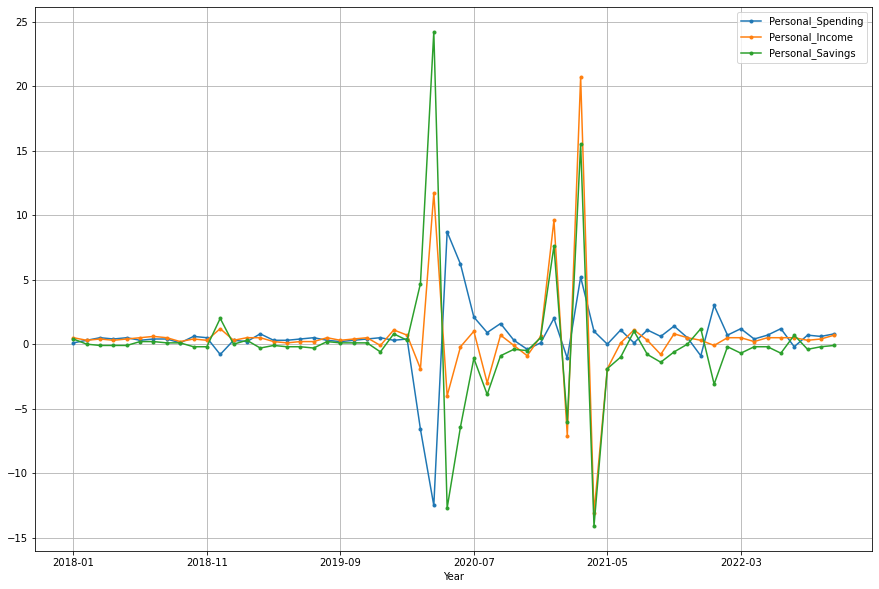

In [9]:
goods_services.plot("Year",["Personal_Spending","Personal_Income","Personal_Savings"],grid=True,marker='o',markersize=3, figsize=(15,10))
plt.savefig("Output\Personal_Income_comparison.png")

# Observations



- Personal Income in the United States averaged 0.53% from 2018 until 2022, reaching an all time high of 20.7%  in March of 2021 and recorded a decrease of -13.1% in April of 2021, along with personal savings.

- Looking at the line graph it has shown that there was a strongest increase reading between the years of 2020 and October of 2021, primarily reflecting due to increases in compensation and government social benefits due to the covid- 19 pandemic. The increase in compensation was led by private wages and salaries. Within private wages and salaries, both services-producing industries and goods-producing industries increased. The increase in government social benefits reflected increases in "other" benefits, primarily reflecting one-time refundable tax credits issued by states.

- Personal Savings and Personal Income seem to be running next to each other as of the years of 2020- 2021 October as the US was dealing with the lock downs due to the pandemic as per the Personal Spending was low during that time frame. 

- As shown in the graph, Personal spending in the US increased 0.8% October of 2022, following a 0.6% rise in September and matching market forecasts helped by a tight labour market and high savings, despite rising prices and borrowing costs. Within services, the largest positive contributor was spending on food services and accommodations.

## Personal Savings v.s Personal Spending:

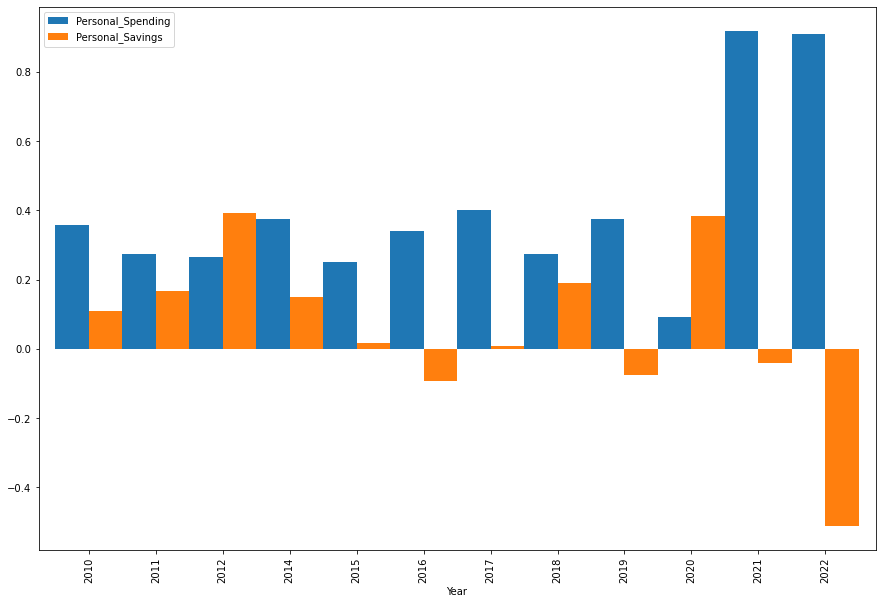

In [10]:
personal_df = personal_consumption.loc[personal_consumption["Y"] >= 2010,:]
pce = personal_df.groupby("Y")["Personal_Spending","Personal_Income"].mean().reset_index()
pce["Personal_Savings"] = pce["Personal_Income"] - pce["Personal_Spending"]
pce = pce.loc[(pce["Personal_Income"]>=0) & (pce["Personal_Spending"]>=0)]
pce.plot.bar('Y',["Personal_Spending", "Personal_Savings"],width=1,figsize=(15,10),xlabel='Year')
plt.savefig("Output\Personal_Saving_Spending_comparison.png")

# Observations

 
- Personal consumption expenditures (PCE) is the primary measure of consumer spending on goods and services in the U.S. economy minus personal income, therefore PCE shows how much of the income earned by households is being spent on current consumption as opposed to how much is being saved for future consumption. 
- Collected data shows that due to the strong inflationary pressure and broad price increases across the economy, mainly in the services sectors have caused consumers spend more than what they have been saving. 
- Prices that were seen increasing was for shelter (0.5%), airline fares (18.6%), and new vehicles (1.1%), prices also increased for medical care (0.4%), recreation (0.4%), and for household furnishings and operations.
- As per the personal saving rate as a share of disposable income in the United States decreased to 2.3% in October of 2022 which is now below 0.4%, this has been the lowest since the great recession in 2013-2014 as the high inflation rate and rising borrowing costs are eating out the cushion Americans accumulated during the COVID-19 pandemic.


# Inflation vs. Grocery Prices and Minimum Wage

In [11]:
# Raw inflation data with cpi

inflation_data.tail()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
105,105,2018.0,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,106,2019.0,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,107,2020.0,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,108,2021.0,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802
109,109,2022.0,281.148,283.716,287.504,289.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Raw food inflation data with food cpi

cpi_food.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,0,2000.0,166.1,166.3,166.5,166.6,167.3,167.3,168.1,168.7,168.9,169.1,168.9,170.0,167.8,166.7,169.0
1,1,2001.0,170.9,171.3,171.7,171.9,172.5,173.0,173.5,173.9,174.1,174.9,174.6,174.7,173.1,171.9,174.3
2,2,2002.0,175.8,175.9,176.1,176.2,175.8,175.8,176.0,176.0,176.4,176.5,176.8,177.3,176.2,175.9,176.5
3,3,2003.0,177.5,178.3,178.6,178.4,178.8,179.6,179.7,180.4,180.7,181.7,182.4,183.6,180.0,178.5,181.4
4,4,2004.0,183.8,184.1,184.4,184.5,186.1,186.3,186.8,186.8,186.7,187.9,188.2,188.5,186.2,184.9,187.5


In [13]:
#  Raw federal minimum wage data with adjusted real minimum wage

mi = minimum_wage
mi = mi.head(13)
mi

,Date,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01),Average wages of production and nonsupervisory workers,Federal minimum wage as a share of average wages of production and nonsupervisory workers,Unnamed: 5
0,2022,$7.25,$7.59,$7.25,$24.67,29.40%
1,2021,$7.25,$8.17,$23.80,30.80%,NaN
2,2020,$7.25,$8.27,$23.41,31.90%,NaN
3,2019,$7.25,$8.47,$23.28,32.90%,NaN
4,2018,$7.25,$8.61,$23.22,33.70%,NaN
5,2017,$7.25,$8.78,$22.98,34.50%,NaN
6,2016,$7.25,$9.00,$22.55,35.20%,NaN
7,2015,$7.25,$9.13,$22.40,36.00%,NaN
8,2014,$7.25,$9.13,$22.28,36.70%,NaN
9,2013,$7.25,$9.27,$22.41,37.30%,NaN


In [14]:
mi_rename = mi.rename(columns={"Date": "Year"})
mi_rename

,Year,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01),Average wages of production and nonsupervisory workers,Federal minimum wage as a share of average wages of production and nonsupervisory workers,Unnamed: 5
0,2022,$7.25,$7.59,$7.25,$24.67,29.40%
1,2021,$7.25,$8.17,$23.80,30.80%,NaN
2,2020,$7.25,$8.27,$23.41,31.90%,NaN
3,2019,$7.25,$8.47,$23.28,32.90%,NaN
4,2018,$7.25,$8.61,$23.22,33.70%,NaN
5,2017,$7.25,$8.78,$22.98,34.50%,NaN
6,2016,$7.25,$9.00,$22.55,35.20%,NaN
7,2015,$7.25,$9.13,$22.40,36.00%,NaN
8,2014,$7.25,$9.13,$22.28,36.70%,NaN
9,2013,$7.25,$9.27,$22.41,37.30%,NaN


In [15]:
foodandcpi_df = pd.merge(inflation_data, cpi_food, on=["Year"], how="inner")
#foodandcpi_df = foodandcpi_df.dropna()
selected_years = foodandcpi_df.loc[foodandcpi_df["Year"] >= 2011 , :]
selected_years
selected_years = selected_years[['Year','Jan_x','Jan_y','Feb_x','Feb_y','Mar_x','Mar_y','Apr_x','Apr_y','May_x','May_y','Jun_x','Jun_y','Jul_x','Jul_y','Aug_x','Aug_y','Sep_x','Sep_y','Oct_x','Oct_y','Nov_x','Nov_y','Dec_x','Dec_y']]
selected_years

,Year,Jan_x,Jan_y,Feb_x,Feb_y,Mar_x,Mar_y,Apr_x,Apr_y,May_x,May_y,Jun_x,Jun_y,Jul_x,Jul_y,Aug_x,Aug_y,Sep_x,Sep_y,Oct_x,Oct_y,Nov_x,Nov_y,Dec_x,Dec_y
11,2011.0,220.223,222.912,221.309,223.799,223.467,225.350,224.906,226.150,225.964,226.976,225.722,227.360,225.922,228.316,226.545,229.554,226.889,230.573,226.421,231.017,226.230,230.790,225.672,231.301
12,2012.0,226.665,232.666,227.663,232.486,229.392,232.792,230.085,233.234,229.815,233.339,229.478,233.563,229.104,233.630,230.379,234.156,231.407,234.298,231.317,234.878,230.221,234.896,229.601,235.390
13,2013.0,230.280,236.341,232.166,236.301,232.773,236.332,232.531,236.841,232.945,236.526,233.504,236.792,233.596,237.001,233.877,237.406,234.149,237.522,233.546,237.871,233.069,237.641,233.049,237.869
14,2014.0,233.916,238.872,234.781,239.608,236.293,240.398,237.072,241.337,237.900,242.344,238.343,242.326,238.250,243.034,237.852,243.811,238.031,244.630,237.433,245.166,236.151,245.192,234.812,245.976
15,2015.0,233.707,246.538,234.722,246.680,236.119,246.045,236.599,246.121,237.805,246.187,238.638,246.680,238.654,247.003,238.316,247.671,237.945,248.632,237.838,249.052,237.336,248.306,236.525,247.903
16,2016.0,236.916,248.631,237.111,248.800,238.132,247.978,239.261,248.413,240.229,247.860,241.018,247.482,240.628,247.554,240.849,247.719,241.428,247.917,241.729,248.073,241.353,247.435,241.432,247.313
17,2017.0,242.839,248.242,243.603,248.791,243.801,249.165,244.524,249.739,244.733,250.016,244.955,249.653,244.786,250.214,245.519,250.493,246.819,250.993,246.663,251.364,246.669,250.871,246.524,251.238
18,2018.0,247.867,252.361,248.991,252.266,249.554,252.370,250.546,253.209,251.588,253.098,251.989,253.231,252.006,253.746,252.146,254.077,252.439,254.393,252.885,254.358,252.038,254.379,251.233,255.210
19,2019.0,251.712,256.417,252.776,257.222,254.202,257.724,255.548,257.708,256.092,258.110,256.143,258.064,256.571,258.274,256.558,258.410,256.759,258.943,257.346,259.632,257.208,259.467,256.974,259.823
20,2020.0,257.971,261.057,258.678,261.876,258.115,262.708,256.389,266.757,256.394,268.439,257.797,269.770,259.101,268.863,259.918,269.079,260.280,269.163,260.388,269.828,260.229,269.069,260.474,270.023


In [16]:
yearly_inflation = inflation_data.loc[inflation_data["Year"] >= 2011]
yearly_inflation = yearly_inflation.drop(yearly_inflation.columns[[0,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=False)
yearly_inflation

,Year,Jan
98,2011.0,220.223
99,2012.0,226.665
100,2013.0,230.280
101,2014.0,233.916
102,2015.0,233.707
103,2016.0,236.916
104,2017.0,242.839
105,2018.0,247.867
106,2019.0,251.712
107,2020.0,257.971


In [17]:
foodprice_change = cpi_food.loc[cpi_food["Year"] >= 2011]
foodprice_change = foodprice_change.drop(foodprice_change.columns[[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=False)
foodprice_change

,Year,Jan
11,2011.0,222.912
12,2012.0,232.666
13,2013.0,236.341
14,2014.0,238.872
15,2015.0,246.538
16,2016.0,248.631
17,2017.0,248.242
18,2018.0,252.361
19,2019.0,256.417
20,2020.0,261.057


In [18]:
# Create list for % of inflation
jan_list = []
for i in foodprice_change["Jan"]:
    jan_list.append(i)
inflation_list = []
for j in range(len(jan_list)-1):
    inflation_list.append(((jan_list[j+1]/jan_list[j])-1)*100)
inflation_list.append(0)
inflation_list

[4.375717772035603,
 1.5795174198206974,
 1.07091025255881,
 3.20925014233564,
 0.8489563475001738,
 -0.15645675720245,
 1.6592679723817838,
 1.6072214010881103,
 1.8095524087716752,
 3.784997146217095,
 6.951405856690451,
 0]

In [19]:
foodprice_change["Inflation"] = inflation_list
food_inflation_df = foodprice_change.loc[foodprice_change["Year"] < 2022, :]
del food_inflation_df["Jan"]
food_inflation_df["Year"] = food_inflation_df["Year"].map("{:.0f}".format)
food_inflation_df["Inflation"] = food_inflation_df["Inflation"].map("{:.2f}%".format)
food_inflation_df

,Year,Inflation
11,2011,4.38%
12,2012,1.58%
13,2013,1.07%
14,2014,3.21%
15,2015,0.85%
16,2016,-0.16%
17,2017,1.66%
18,2018,1.61%
19,2019,1.81%
20,2020,3.78%


In [20]:
jan_list_general = []
for i in yearly_inflation["Jan"]:
    jan_list_general.append(i)
inflation_list_general = []

for j in range(len(jan_list_general)-1):
    inflation_list_general.append(((jan_list_general[j+1]/jan_list_general[j])-1)*100)
inflation_list_general.append(0)
inflation_list_general

[2.9252167121508466,
 1.5948646681225531,
 1.5789473684210575,
 -0.08934831306964819,
 1.3730868138309926,
 2.5000422090529995,
 2.0705076202751638,
 1.5512351381991252,
 2.4865719552504606,
 1.3997697415600863,
 7.479872468289117,
 0]

In [21]:
yearly_inflation["Inflation"] = inflation_list_general
general_inflation_df = yearly_inflation.loc[yearly_inflation["Year"] < 2022, :]
del general_inflation_df["Jan"]
general_inflation_df["Year"] = general_inflation_df["Year"].map("{:.0f}".format)
general_inflation_df["Inflation"] = general_inflation_df["Inflation"].map("{:.2f}%".format)
general_inflation_df

,Year,Inflation
98,2011,2.93%
99,2012,1.59%
100,2013,1.58%
101,2014,-0.09%
102,2015,1.37%
103,2016,2.50%
104,2017,2.07%
105,2018,1.55%
106,2019,2.49%
107,2020,1.40%


In [22]:
minimum_wage_all = mi_rename.drop(mi_rename.columns[[3,4,5]], axis=1, inplace=False)
minimum_wage_all = minimum_wage_all.loc[minimum_wage_all["Year"] > 2010, :]
minimum_wage_all

,Year,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01)
0,2022,$7.25,$7.59
1,2021,$7.25,$8.17
2,2020,$7.25,$8.27
3,2019,$7.25,$8.47
4,2018,$7.25,$8.61
5,2017,$7.25,$8.78
6,2016,$7.25,$9.00
7,2015,$7.25,$9.13
8,2014,$7.25,$9.13
9,2013,$7.25,$9.27


In [23]:
merged_df1 = pd.merge(food_inflation_df, general_inflation_df, on=["Year"], how="inner")
merged_df1
all_inflation = merged_df1.rename(columns={"Inflation_x": "Annual food inflation rate %",
                                                "Inflation_y": "Annual inflation rate %"})
all_inflation

,Year,Annual food inflation rate %,Annual inflation rate %
0,2011,4.38%,2.93%
1,2012,1.58%,1.59%
2,2013,1.07%,1.58%
3,2014,3.21%,-0.09%
4,2015,0.85%,1.37%
5,2016,-0.16%,2.50%
6,2017,1.66%,2.07%
7,2018,1.61%,1.55%
8,2019,1.81%,2.49%
9,2020,3.78%,1.40%


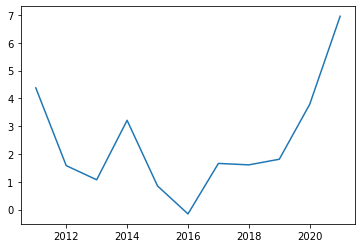

In [24]:
Year = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.plot(Year,inflation_list[ : -1])
plt.show()

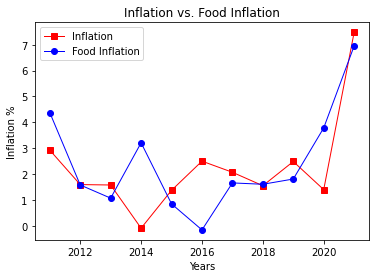

In [25]:
Inflation, = plt.plot(Year, inflation_list_general[ : -1], marker="s",color="red", linewidth=1, label="Inflation")
Food_Inflation, = plt.plot(Year, inflation_list[ : -1], marker="o",color="blue", linewidth=1, label="Food Inflation")
plt.legend(handles=[Inflation, Food_Inflation], loc="best")
plt.xlabel("Years")
plt.ylabel("Inflation %")
plt.title("Inflation vs. Food Inflation")
plt.savefig("Output\Inflation_comparison.png")
plt.show()

# Observations

This line graph show the trend of inflation and food inflation. From the graph, you can see the trend of inflation and food inflation is generally following each other except 2014 to 2016. 

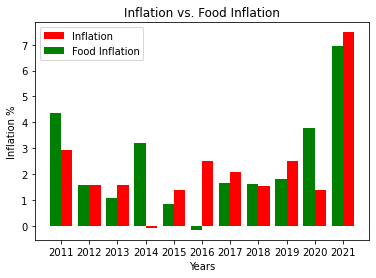

In [26]:
X_axis = np.arange(len(Year))
inflation = plt.bar(X_axis + 0.2, inflation_list_general[ : -1], 0.4, color = "red", label = "Inflation")
food_inflation = plt.bar(X_axis - 0.2, inflation_list[ : -1], 0.4, color = "green", label = "Food Inflation")
plt.xticks(X_axis, Year)
plt.xlabel("Years")
plt.ylabel("Inflation %")
plt.title("Inflation vs. Food Inflation")
plt.legend(handles=[inflation, food_inflation], loc="best")
plt.savefig("Output\Inflation_bargraph.png")
plt.show()

# Observations

This bar graph is nice for comparison for inflation in general and food inflation. From this chart, you can see two inflations following each other except 2014,2016 and 2020. I assume the phenomenon is due to food inflation is more sensitive to monetary policy issued by central bank. Since food is basic needs and the demand won't decrease even if the money depreciate. 

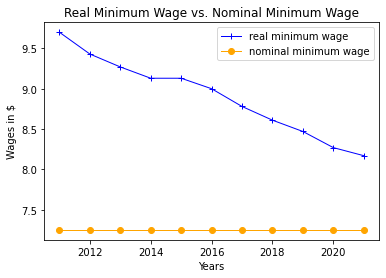

In [27]:
minimum_wage_list = [7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25]
real_minimum_wage_list = [9.70,9.43,9.27,9.13,9.13,9.00,8.78,8.61,8.47,8.27,8.17]
real_minimum_wage, = plt.plot(Year, real_minimum_wage_list, color="blue", marker = "+", linewidth=1, label="real minimum wage")
nominal_wage, = plt.plot(Year, minimum_wage_list, color="orange", marker = "o", linewidth=1, label="nominal minimum wage")
plt.legend(handles=[real_minimum_wage, nominal_wage], loc="best")
plt.xlabel("Years")
plt.ylabel("Wages in $")
plt.title("Real Minimum Wage vs. Nominal Minimum Wage")
plt.savefig("Output\minimum wage.png")
plt.show()

# Observations

This graph shows the nominal minimum wage doesn't change with the inflation but the blue line shows the the money depreciate due to the inflation. You can easily see how the purchasing power of minimum wage decreased with inflation. 

In [28]:
all_list = {"Year": Year, "Nominal Minimum Wage": minimum_wage_list, "Real Minimum Wage": real_minimum_wage_list,
             "Inflation": inflation_list_general[ : -1], "Food Inflation": inflation_list[ : -1]}
allseries_df = pd.DataFrame(data=all_list)
allseries_df

,Year,Nominal Minimum Wage,Real Minimum Wage,Inflation,Food Inflation
0,2011,7.25,9.70,2.925217,4.375718
1,2012,7.25,9.43,1.594865,1.579517
2,2013,7.25,9.27,1.578947,1.070910
3,2014,7.25,9.13,-0.089348,3.209250
4,2015,7.25,9.13,1.373087,0.848956
5,2016,7.25,9.00,2.500042,-0.156457
6,2017,7.25,8.78,2.070508,1.659268
7,2018,7.25,8.61,1.551235,1.607221
8,2019,7.25,8.47,2.486572,1.809552
9,2020,7.25,8.27,1.399770,3.784997


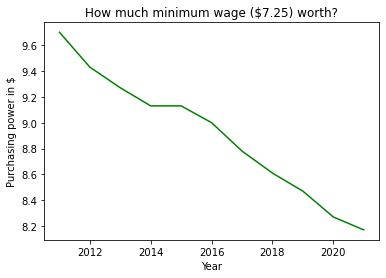

In [29]:
plt.plot(Year, real_minimum_wage_list, color="green", label="Real Minimum Wage")
plt.title("How much minimum wage ($7.25) worth?")
plt.xlabel("Year")
plt.ylabel("Purchasing power in $")
plt.savefig("Output\Value_depreciate.png")
plt.show()

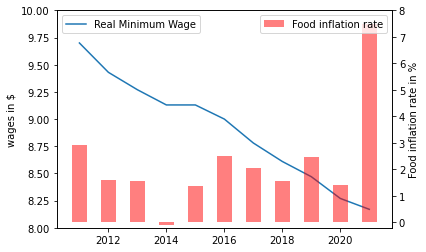

In [30]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(Year, real_minimum_wage_list) 
ax1.set_ylabel('wages in $')
ax1.set_ylim(8, 10)
ax1.legend(['Real Minimum Wage'], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(Year, inflation_list_general[ : -1], width=0.5, alpha=0.5, color='red')
# turn off grid #2
ax2.grid(False) 
ax2.set_ylabel('Food inflation rate in %')
ax2.set_ylim(-0.2, 8.0)
ax2.legend(['Food inflation rate'], loc="upper right")
plt.savefig("Output\Inflation and wage.png")
plt.show()

# Observations

This graph shows how food inflation related with real minimum wage. You can see the wages decrease faster when the food inflation is higher and vice versa. The relationship between food inflation and real minimum wage is closer than the relationship between food inflation and inflation in general. How interesting is that!

# Inflation vs. Labour Market

In [31]:
# Creating a DataFrame of the Averages for each year with available data

Yearly_Average = general_df.groupby("Year")["Population","Inflation","Inflation_Rate","Minimum_Wages",'Youth_Unemployment_Rate','Wages_in_Manufacturing','Wages','Wage_Growth','CPI_Core_Core','CPI','Unemployment_Rate','Unemployed_Persons','Productivity','Part_Time_Employment','Nonfarm_Payrolls_Private','Manufacturing_Payrolls','Long_Term_Unemployment_Rate','Labour_Costs','Job_Vacancies','Job_Quits_Rate','Job_Quits','Job_Offers','Government_Payrolls','Full_Time_Employment','Employment_Rate','Employment_Cost_Index','Employed_Persons','Bankruptcies','Average_Weekly_Hours','Average_Hourly_Earnings','ADP_Employment_Change'].mean().reset_index()
Yearly_Average.dropna(how='any',inplace=True)
Yearly_Average

,Year,Population,Inflation,Inflation_Rate,Minimum_Wages,Youth_Unemployment_Rate,Wages_in_Manufacturing,Wages,Wage_Growth,CPI_Core_Core,CPI,Unemployment_Rate,Unemployed_Persons,Productivity,Part_Time_Employment,Nonfarm_Payrolls_Private,Manufacturing_Payrolls,Long_Term_Unemployment_Rate,Labour_Costs,Job_Vacancies,Job_Quits_Rate,Job_Quits,Job_Offers,Government_Payrolls,Full_Time_Employment,Employment_Rate,Employment_Cost_Index,Employed_Persons,Bankruptcies,Average_Weekly_Hours,Average_Hourly_Earnings,ADP_Employment_Change
110,2010,309.330,0.116667,1.625000,7.25,18.433333,18.605833,19.048333,1.973333,1.533333,218.055500,9.608333,14807.750000,99.4175,27349.000000,104.166667,10.000000,4.166667,96.30100,2973.000000,1.425000,1857.916667,2968.916667,-18.000000,111711.750000,58.475000,0.450,139077.166667,58840.00,34.133333,0.150000,-103.272727
111,2011,311.580,0.250000,3.166667,7.25,17.316667,18.927500,19.435000,3.995833,1.800000,224.939167,8.933333,13738.500000,99.3175,27314.416667,198.833333,17.250000,3.916667,98.40000,3429.666667,1.483333,1972.333333,3430.166667,-26.000000,112564.166667,58.375000,0.475,139885.166667,51011.75,34.341667,0.175000,119.333333
112,2012,313.870,0.150000,2.083333,7.25,16.216667,19.079167,19.724167,4.557500,2.125000,229.593917,8.075000,12499.166667,100.1500,27659.000000,186.916667,13.166667,3.314167,99.99675,3839.250000,1.533333,2083.833333,3841.000000,-5.583333,114816.500000,58.558333,0.450,142474.583333,43227.75,34.433333,0.175000,204.333333
113,2013,316.060,0.116667,1.483333,7.25,15.525000,19.295000,20.132500,2.696667,1.441667,232.957083,7.358333,11457.166667,100.5650,27619.166667,197.333333,10.250000,2.773333,100.73925,4065.500000,1.675000,2288.833333,4070.500000,-5.583333,116315.666667,58.600000,0.475,143940.666667,35429.25,34.450000,0.141667,180.583333
114,2014,318.390,0.050000,1.633333,7.25,13.366667,19.561667,20.594167,5.089167,1.041667,236.736167,6.158333,9601.500000,101.1875,27587.750000,239.750000,17.416667,2.063333,102.87300,4770.583333,1.833333,2534.916667,4773.083333,10.583333,118725.750000,59.008333,0.550,146318.666667,29271.50,34.508333,0.166667,320.583333
115,2015,320.740,0.066667,0.125000,7.25,11.616667,19.904167,21.020000,5.132500,1.016667,237.017000,5.275000,8293.750000,102.3975,27353.416667,214.166667,5.833333,1.482500,104.81025,5566.666667,1.966667,2803.916667,5563.833333,12.500000,121491.833333,59.333333,0.525,148844.666667,25224.00,34.516667,0.208333,239.250000
116,2016,323.070,0.175000,1.266667,7.25,10.433333,20.435000,21.544167,2.948333,1.516667,240.007167,4.875000,7751.333333,102.8825,27676.583333,175.916667,-0.583333,1.257500,105.56600,5856.500000,2.083333,2989.083333,5855.500000,17.250000,123736.750000,59.733333,0.575,151436.416667,24648.75,34.408333,0.208333,201.333333
117,2017,325.120,0.183333,2.116667,7.25,9.241667,20.897500,22.043333,4.730000,0.983333,245.119583,4.358333,6984.666667,104.1925,27388.250000,173.666667,15.333333,1.051667,108.02375,6120.833333,2.150000,3144.750000,6118.500000,7.583333,125950.666667,60.125000,0.625,153334.583333,23325.00,34.391667,0.225000,200.833333
118,2018,326.840,0.166667,2.450000,7.25,8.600000,21.535000,22.700833,5.030833,1.325000,251.106833,3.891667,6314.666667,105.7725,27198.833333,183.083333,21.916667,0.834167,110.10900,7104.833333,2.266667,3364.250000,7102.166667,10.083333,128545.416667,60.425000,0.750,155759.083333,22421.50,34.483333,0.291667,257.833333
119,2019,328.330,0.200000,1.816667,7.25,8.375000,22.146667,23.506667,4.773333,1.375000,255.657417,3.675000,5999.916667,107.7600,26933.833333,149.833333,0.583333,0.772500,112.06050,7161.166667,2.325000,3517.250000,7157.750000,17.750000,130563.333333,60.783333,0.700,157529.916667,22582.50,34.400000,0.250000,206.333333


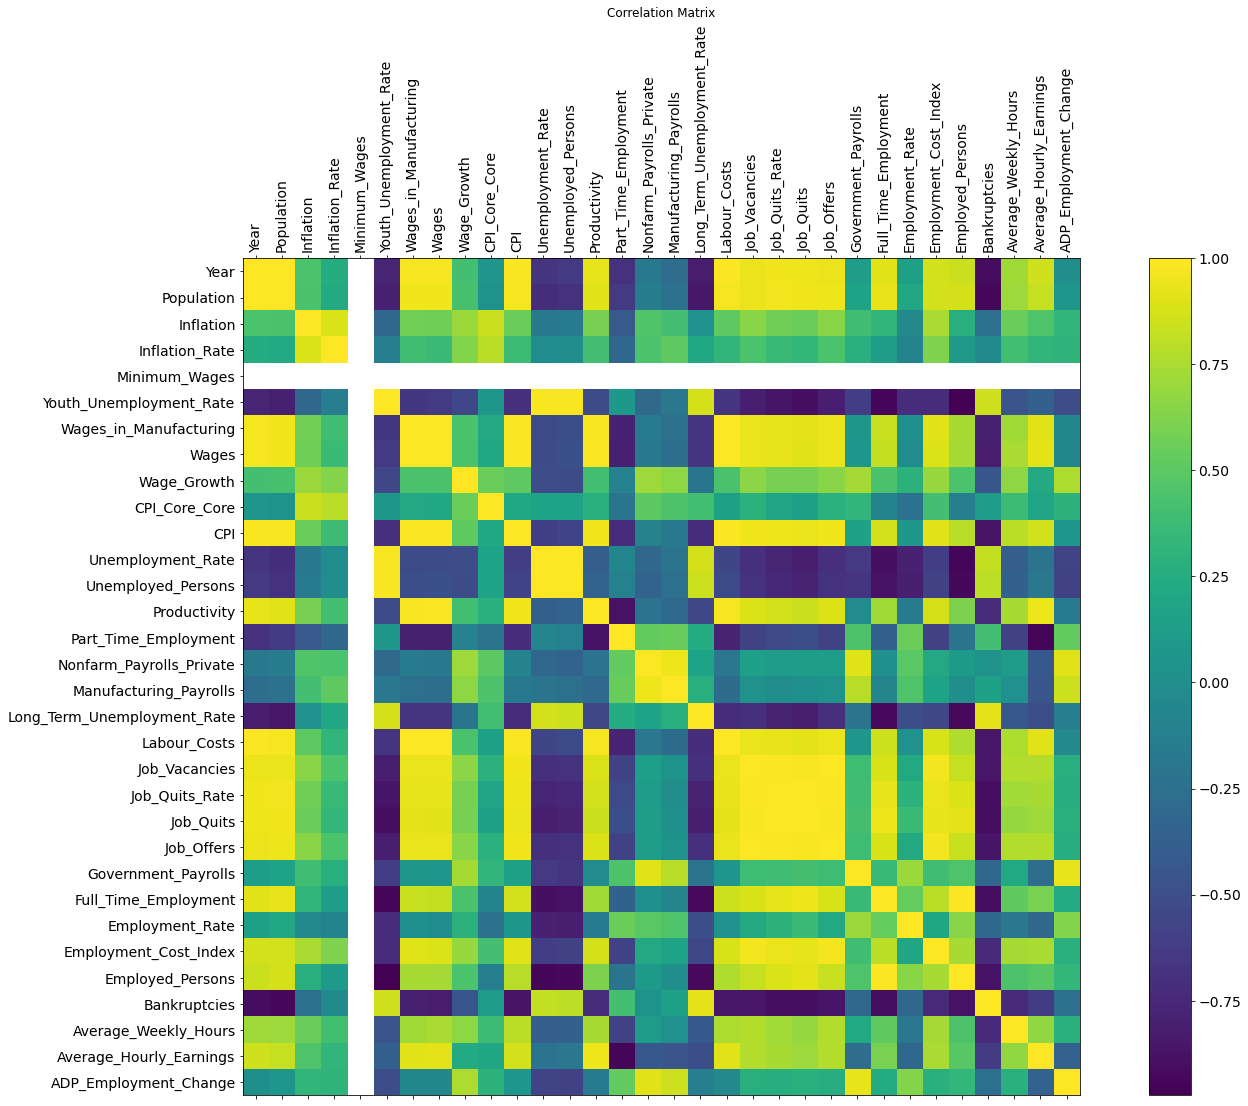

In [32]:
# Creating a Correlation Matrix to obtain an overall view of Inflation's affect on different aspects of Labour market

f = plt.figure(figsize=(25,15))
plt.matshow(Yearly_Average.corr(), fignum=f.number)
plt.xticks(range(Yearly_Average.select_dtypes(['number']).shape[1]), Yearly_Average.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(Yearly_Average.select_dtypes(['number']).shape[1]), Yearly_Average.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=12)
plt.savefig("Output\Correlation_Matrix.png")

## Observations
From this correlation matrix, if we take a closer look to inflation and inflation rate, we can see it's increasing with year which is expeted, then we can understand that it affects wage growth more than wage, also it's visible that the most positively correlated indicator with inflation is CPI_Core_Core ( which tracks changes in prices that consumers pay for a basket of goods excluding cost of food, shelter, energy, and used cars and trucks ), and after that is Employment_Cost_Index.
For the most negatively correlated indicator we can clearly see Part_Time_Employment, Unemployment_Rate and also Bankruptcies.

So we can do some further analysis on the effects of inflation on CPI and core core CPI, Employment costs, Employment/Unemployment Rates, Full-time/Part-time Employment and Wage Growth.

This chart also shows us that inflation affects the job vacancies, job offers, job quits and Labour costs.

# Inflation vs. CPI and core core CPI

In the United States, the Consumer Price Index or CPI measures changes in the prices paid by consumers for a basket of goods and services and the "core core" inflation rate tracks changes in prices that consumers pay for a basket of goods excluding cost of food, shelter, energy, and used cars and trucks.

In [33]:
Inflation_vs_CPI_df = general_df[['Year','Month','Inflation','CPI','Unemployment_Rate','CPI_Core_Core']].dropna(how='any').sort_values(by=['Year','Month'])
Inflation_vs_CPI_df.reset_index(drop=True,inplace=True)
Inflation_vs_CPI_df.head()

,Year,Month,Inflation,CPI,Unemployment_Rate,CPI_Core_Core
0,1968,1,0.3,34.1,3.7,4.1
1,1968,2,0.3,34.2,3.8,4.1
2,1968,3,0.3,34.3,3.7,4.6
3,1968,4,0.3,34.4,3.5,4.3
4,1968,5,0.3,34.5,3.5,4.8


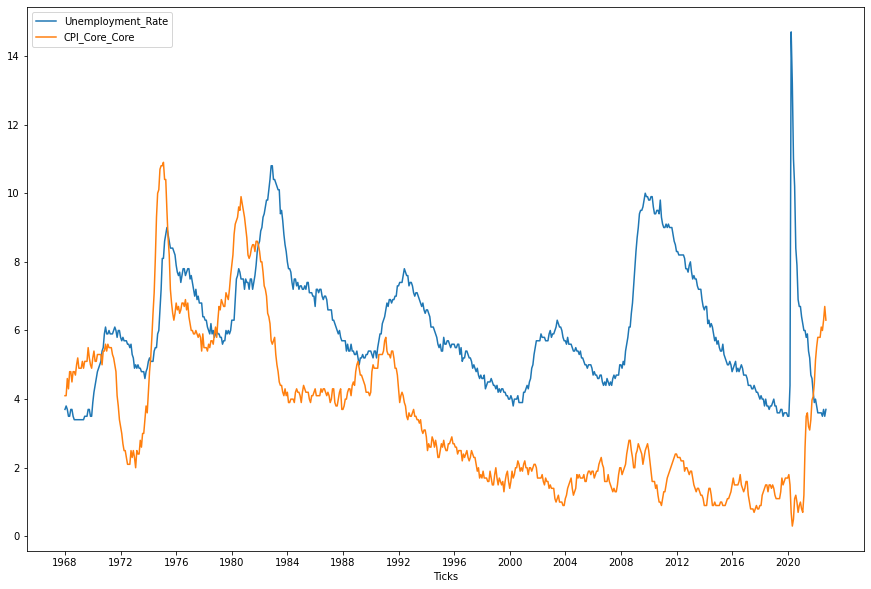

In [34]:
# Potting core core CPI, Unemployment Rate and Inflation Rate

xticks = [1968]
for a in range(len(Inflation_vs_CPI_df['Year'])-1):
    xticks.append(xticks[a]+0.08333333)

tickname = []    
for b in range((Inflation_vs_CPI_df['Year'].nunique())-1):
    if (1968+b)%4==0:
        tickname.append(1968+b)
    

Inflation_vs_CPI_df["Ticks"] = xticks
Inflation_vs_CPI_df.plot('Ticks',['Unemployment_Rate','CPI_Core_Core'],figsize=(15,10),xticks=tickname)
plt.savefig("Output\CPI_Unemployment.png")

# Observations

In the graphs above, we can see the inverse correlation between inflation—as measured by the rate of change of the CPI—and unemployment reasserts itself, only to break down at times. 

In 2001, the mild recession as a result of 9/11 pushed unemployment higher to roughly 6% while inflation fell below 2.5%.
In the mid-2000s, as unemployment fell, inflation was steady around 1% to 2.5%.
During the Great Recession, the rate of change of the CPI fell dramatically as unemployment soared to almost 10%.
From 2012 to 2015, we can see that the inverse correlation broke down where inflation and unemployment moved in tandem.
From 2016 to 2019, unemployment steadily declined to 50-year lows (before the onset of COVID-19 at the end of 2019), while inflation remained around 2%. In other words, the inverse correlation between the two indicators wasn't as strong as it was in prior years.

In the year 2020, unemployment soared to almost 15% (in April 2020) as a result of the economic impacts of the global pandemic caused by COVID-19, but decreased steadily through January 2021. In January 2021, the unemployment rate fell by 0.4 percentage points, to 6.3%. Although this measure is lower than the high reached in April 2020, it remains well above pre-pandemic levels (3.5%) in February 2020. During this time, inflation remained relatively unaffected, although prices began to rise sharply starting in February of 2021. These price rises were primarily due to the simultaneous supply shocks to the global economy, although likely increased as a result of the shortage of labor in essential industries.

<AxesSubplot:xlabel='Inflation', ylabel='CPI_Core_Core'>

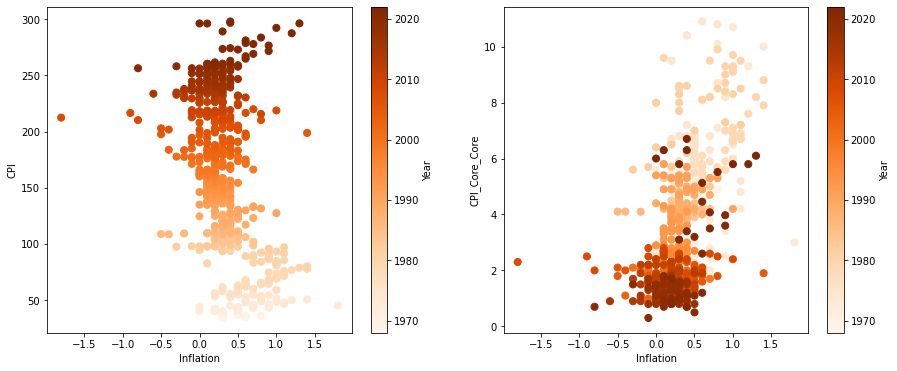

In [35]:
fig ,axes = plt.subplots(nrows=1,ncols=2)
Inflation_vs_CPI_df.plot.scatter(x='Inflation',y='CPI',c='Year',ax=axes[0],colormap='Oranges',s=50,figsize=(15,6))
Inflation_vs_CPI_df.plot.scatter(x='Inflation',y='CPI_Core_Core',ax=axes[1],c='Year',colormap='Oranges',s=50)

# Employment costs & Labour costs

In [36]:
Costs_df = general_df[['Year','Month','Inflation','Employment_Cost_Index','Labour_Costs']].dropna(how='any').sort_values(by=['Year','Month'])
Costs_df.reset_index(drop=True,inplace=True)

In [37]:
Labour_Costs_Change = []
for i in range(len(Costs_df['Labour_Costs'])-1):
    Labour_Changes = (Costs_df['Labour_Costs'][i+1]-Costs_df['Labour_Costs'][i])/Costs_df['Labour_Costs'][i]
    Labour_Costs_Change.append(Labour_Changes*100)
Labour_Costs_Change.append(Labour_Costs_Change[len(Labour_Costs_Change)-1])  
Costs_df["Labour_Costs_Change"] = Labour_Costs_Change
Costs_df.head()

,Year,Month,Inflation,Employment_Cost_Index,Labour_Costs,Labour_Costs_Change
0,1982,6,1.1,1.5,61.701,1.380853
1,1982,9,0.0,2.0,62.553,0.631465
2,1982,12,-0.3,1.5,62.948,-0.278007
3,1983,3,0.1,1.2,62.773,-1.175665
4,1983,6,0.2,1.7,62.035,0.083824


In [38]:
Costs_df.reset_index(inplace=True)
Costs_df_Recent = Costs_df.loc[Costs_df['Year']>2009,:]

<AxesSubplot:xlabel='Year'>

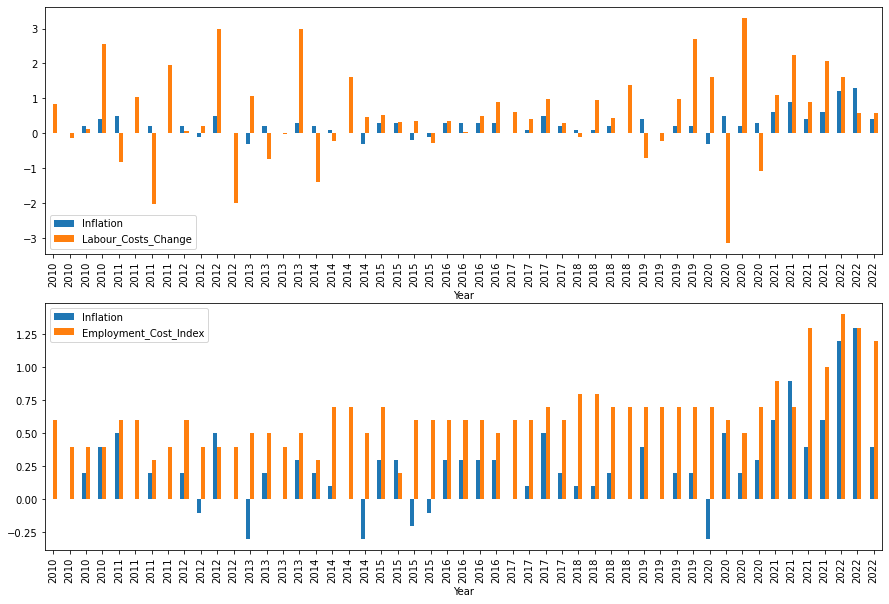

In [39]:
fig ,axes = plt.subplots(nrows=2,ncols=1)
Costs_df_Recent.plot.bar('Year',['Inflation','Labour_Costs_Change'],figsize=(15,10),ax=axes[0])
Costs_df_Recent.plot.bar('Year',['Inflation','Employment_Cost_Index'],figsize=(15,10),ax=axes[1]) 

# Inflation vs. Unemployment Rate

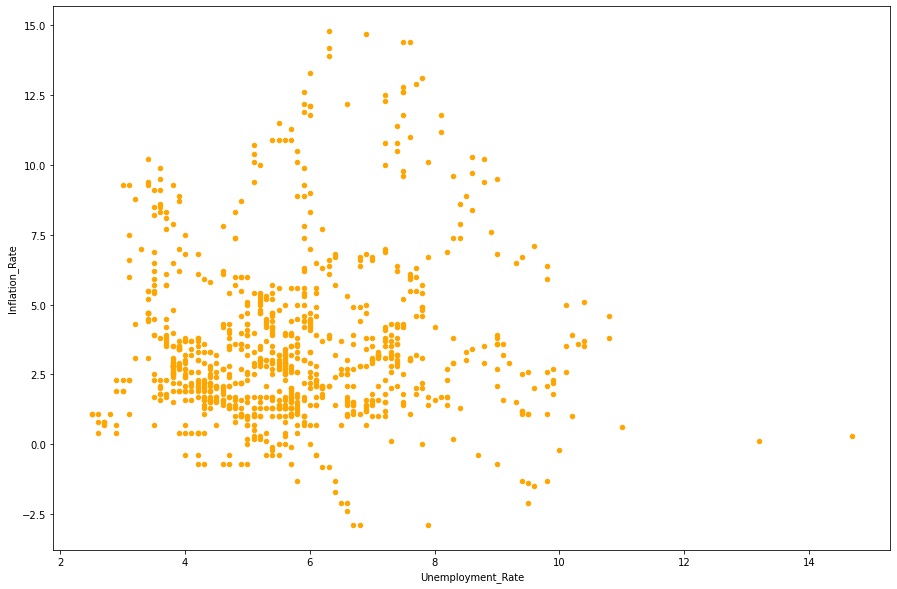

In [40]:
Inflation_vs_Unemployment_df = general_df[['Year','Month','Inflation_Rate','Unemployment_Rate']].dropna(how='any').sort_values(by=['Year','Month'])
Inflation_vs_Unemployment_df.plot.scatter('Unemployment_Rate','Inflation_Rate',figsize=(15,10),c='orange')
plt.savefig("Output\Overall_Inflation_vs_Unemployment.png")

The inverse correlation between inflation and unemployment works well in the short run, especially when inflation is fairly constant as it was in the 1960s. It does not hold up over the long-term since the economy reverts to the natural rate of unemployment as it adjusts to any rate of inflation.

Because it's also more complicated than it appears at first glance, the relationship between inflation and unemployment has broken down in periods like the stagflationary 1970s and the booming 1990s.

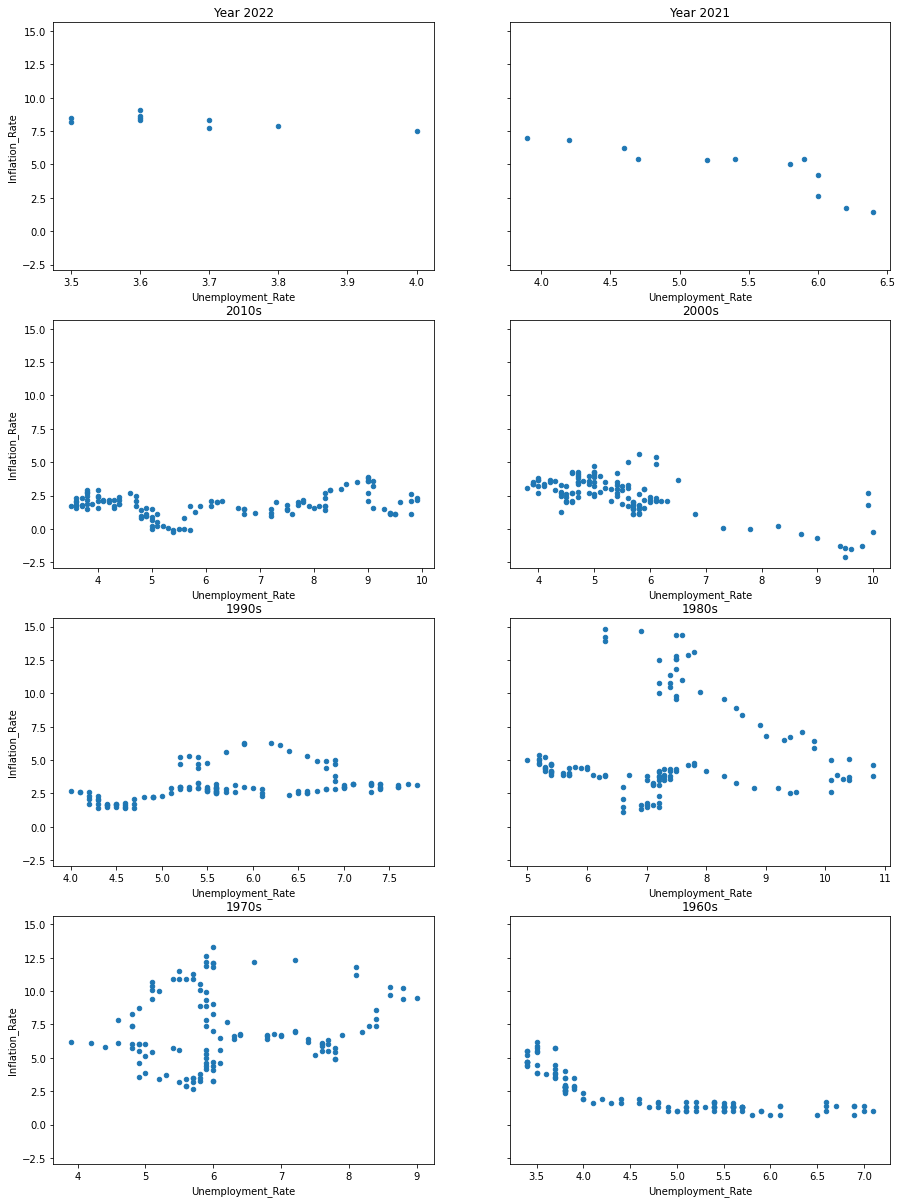

In [41]:
fig ,axes = plt.subplots(nrows=4,ncols=2,sharey=True)
Inflation_vs_Unemployment_df.loc[Inflation_vs_Unemployment_df['Year']==2022].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[0,0],figsize=(20,30),title="Year 2022")
Inflation_vs_Unemployment_df.loc[Inflation_vs_Unemployment_df['Year']==2021].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[0,1],figsize=(15,30),title="Year 2021")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=2010)&(Inflation_vs_Unemployment_df['Year']<2020)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[1,0],figsize=(15,30),title="2010s")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=2000)&(Inflation_vs_Unemployment_df['Year']<2010)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[1,1],figsize=(15,15),title="2000s")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=1990)&(Inflation_vs_Unemployment_df['Year']<2000)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[2,0],figsize=(15,15),title="1990s")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=1980)&(Inflation_vs_Unemployment_df['Year']<1990)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[2,1],figsize=(15,15),title="1980s")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=1970)&(Inflation_vs_Unemployment_df['Year']<1980)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[3,0],figsize=(15,15),title="1970s")
Inflation_vs_Unemployment_df.loc[(Inflation_vs_Unemployment_df['Year']>=1960)&(Inflation_vs_Unemployment_df['Year']<1970)].plot.scatter('Unemployment_Rate','Inflation_Rate',ax=axes[3,1],figsize=(15,21),title="1960s")
plt.savefig("Output\YoY_Inflation_vs_Unemployment.png")

# Observations


For example the last plot shows the rate of change of the inflation and unemployment rates in the 1960s.
In this chart we can see that if unemployment rate lowers from 6% to 5%, prices would not rise by much but if it goes to 4% or less, then inflation rate would rise from 1% to 3% and above.





However, in 1970s unlike the data from the 1960s, there's no clear evidence of the inverse relationship between unemployment and inflation.
The 1970s were a period of both high inflation and high unemployment in the U.S. due to two massive oil supply shocks. The first oil shock was from the 1973 embargo by Middle East energy producers that caused crude oil prices to quadruple in about a year.
The second oil shock occurred when the Shah of Iran was overthrown in a revolution and the loss of output from Iran caused crude oil prices to double between 1979 and 1980.
This development led to both high unemployment and high inflation.






The boom years of the 1990s were a time of low inflation and low unemployment. There can be multiple reasons for this positive confluence of circumstances such as:

*The global competition that kept a lid on price increases by U.S. producers,

*Reduced expectations of future inflation as tight monetary policies had led to declining inflation for more than a decade,

*Productivity improvements due to the large-scale adoption of technology,

*Demographic changes in the labor force, with more aging baby boomers and fewer teens working.

In [42]:
Inflation_vs_WageGrowth = general_df[['Year','Month','Inflation_Rate','Wage_Growth']].dropna(how='any').sort_values(by=['Year','Month'])
Inflation_vs_WageGrowth.reset_index(drop=True,inplace=True)
Inflation_vs_WageGrowth.tail()

,Year,Month,Inflation_Rate,Wage_Growth
749,2022,6,9.1,9.010
750,2022,7,8.5,8.710
751,2022,8,8.3,8.530
752,2022,9,8.2,8.220
753,2022,10,7.7,6.679


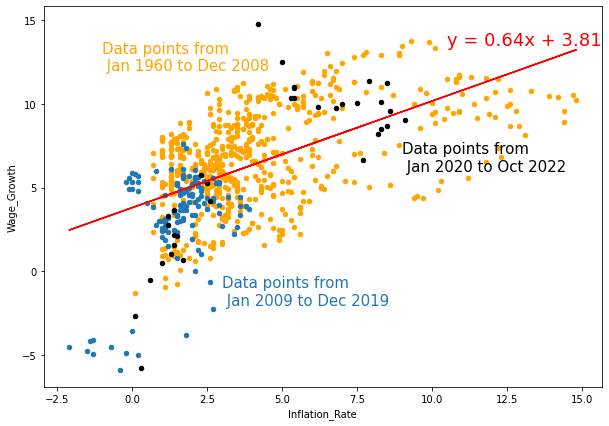

In [44]:
before_2009 = Inflation_vs_WageGrowth.loc[Inflation_vs_WageGrowth['Year']<2009,:]
after_2009 = Inflation_vs_WageGrowth.loc[(Inflation_vs_WageGrowth['Year']>=2009) & (Inflation_vs_WageGrowth['Year']<2020),:]
recently = Inflation_vs_WageGrowth.loc[Inflation_vs_WageGrowth['Year']>=2020,:]

ax = before_2009.plot.scatter('Inflation_Rate','Wage_Growth',c='orange',figsize=(10,7))
after_2009.plot.scatter('Inflation_Rate','Wage_Growth',ax=ax)
recently.plot.scatter('Inflation_Rate','Wage_Growth',c='black',ax=ax)
x_val = Inflation_vs_WageGrowth['Inflation_Rate']
y_val = Inflation_vs_WageGrowth['Wage_Growth']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
plt.plot(x_val,reg_val,'r-')
eqtn ="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(eqtn,(10.5,13.5),fontsize=18,color='red')
plt.annotate("Data points from\n Jan 1960 to Dec 2008",(-1,12),color='orange',fontsize=15)
plt.annotate("Data points from\n Jan 2009 to Dec 2019",(3,-2),color='#1f77b4',fontsize=15)
plt.annotate("Data points from\n Jan 2020 to Oct 2022",(9,6),color='black',fontsize=15)
plt.savefig("Output\Inflation_vs_WageGrowth.png")

Each of the orange circles represent a month of the period January 1960 through December 2008, the end of the Great Recession. The blue circles are represent January 2009 through December 2019. The red line shows the relationship between inflation and wage growth for the period January 1960 through June 2009.

The positive slope of the line indicates that as inflation increases, wage growth also rises.

# Inflation vs. Real Estate

In [45]:
Inflation_rate['Year'] = Inflation_rate['Year'].map("{:.0f}".format)
Inflation_rate = Inflation_rate.set_index('Year')
Inflation_rate = Inflation_rate.transpose()
Inflation_rate = Inflation_rate.reset_index()
Inflation_rate.rename(columns={'index':'Month'},inplace=True)
Inflation_rate.head(10)

Year,Month,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950,1949,1948,1947,1946,1945,1944,1943,1942,1941,1940,1939,1938,1937,1936,1935,1934,1933,1932,1931,1930,1929,1928,1927,1926,1925,1924,1923,1922,1921,1920,1919,1918,1917,1916,1915,1914,nan,nan,nan
0,Jan,7.48,1.40,2.49,1.55,2.07,2.50,1.37,-0.09,1.58,1.59,2.93,1.63,2.63,0.03,4.28,2.08,3.99,2.97,1.93,2.60,1.14,3.73,2.74,1.67,1.57,3.04,2.73,2.80,2.52,3.26,2.60,5.65,5.20,4.67,4.05,1.46,3.89,3.53,4.19,3.71,8.39,11.83,13.91,9.28,6.84,5.22,6.72,11.80,9.39,3.65,3.27,5.29,6.18,4.40,3.65,3.46,1.92,0.97,1.64,1.33,0.67,1.71,1.03,1.40,3.62,2.99,0.37,-0.74,1.13,0.38,4.33,8.09,-2.08,1.27,10.23,18.13,2.25,2.30,2.96,7.64,11.35,1.44,-0.71,-1.41,0.71,2.17,1.47,3.03,2.33,-9.79,-10.06,-7.02,0.00,-1.16,-1.14,-2.23,3.47,0.00,2.98,-0.59,-11.05,-1.55,16.97,17.86,19.66,12.50,2.97,1.00,2.04,NaN,NaN,NaN
1,Feb,7.87,1.68,2.33,1.52,2.21,2.74,1.02,-0.03,1.13,1.98,2.87,2.11,2.14,0.24,4.03,2.42,3.60,3.01,1.69,2.98,1.14,3.53,3.22,1.61,1.44,3.03,2.65,2.86,2.52,3.25,2.82,5.31,5.26,4.83,3.94,2.10,3.11,3.52,4.60,3.49,7.62,11.41,14.18,9.86,6.43,5.91,6.29,11.23,10.02,3.87,3.51,5.00,6.15,4.68,3.95,2.81,2.56,0.97,1.64,1.00,1.01,1.36,1.73,1.05,3.25,3.36,0.37,-0.74,1.51,0.76,2.33,9.36,-1.26,1.28,9.30,18.78,1.69,2.30,2.96,6.96,12.06,0.71,0.72,-1.42,0.00,2.17,0.73,3.01,4.72,-9.93,-10.19,-7.65,-0.58,0.00,-1.72,-2.79,4.07,0.00,2.38,-0.59,-8.15,-5.64,20.37,14.89,17.50,15.38,4.00,1.01,1.02,NaN,NaN,NaN
2,Mar,8.54,2.62,1.54,1.86,2.36,2.38,0.85,-0.07,1.51,1.47,2.65,2.68,2.31,-0.38,3.98,2.78,3.36,3.15,1.74,3.02,1.48,2.92,3.76,1.73,1.37,2.76,2.84,2.85,2.51,3.09,3.19,4.90,5.23,4.98,3.93,3.03,2.26,3.70,4.80,3.60,6.78,10.49,14.76,10.09,6.55,6.44,6.07,10.25,10.39,4.59,3.50,4.71,5.82,5.25,3.94,2.80,2.56,1.29,1.31,1.33,1.01,1.36,1.73,0.35,3.60,3.73,0.37,-0.74,1.13,1.14,1.94,9.32,-0.84,1.71,6.85,19.67,2.81,2.30,1.16,7.50,12.68,1.43,0.72,-1.42,-0.70,3.65,0.00,3.01,5.56,-10.00,-10.26,-7.69,-0.59,-0.58,-1.16,-2.81,2.89,1.17,1.79,0.60,-8.74,-7.11,20.12,17.14,16.67,14.29,6.06,0.00,1.02,NaN,NaN,NaN
3,Apr,8.26,4.16,0.33,2.00,2.46,2.20,1.13,-0.20,1.95,1.06,2.30,3.16,2.24,-0.74,3.94,2.57,3.55,3.51,2.29,2.22,1.64,3.27,3.07,2.28,1.44,2.50,2.90,3.05,2.36,3.23,3.18,4.89,4.71,5.12,3.90,3.78,1.59,3.69,4.56,3.90,6.51,10.00,14.73,10.49,6.50,6.95,6.05,10.21,10.09,5.06,3.49,4.16,6.06,5.52,3.93,2.48,2.87,1.62,1.31,0.99,1.34,1.02,1.72,0.35,3.58,3.72,0.75,-0.37,0.75,0.76,2.33,9.32,-1.26,0.42,8.68,19.02,3.37,1.71,0.57,8.07,12.59,2.14,1.45,-2.82,-0.70,4.38,-0.72,3.76,5.56,-9.35,-10.32,-8.82,0.59,-1.17,-1.16,-3.35,4.07,1.18,0.59,1.20,-7.73,-10.84,21.56,17.61,12.70,18.87,6.00,2.04,0.00,NaN,NaN,NaN
4,May,8.58,4.99,0.12,1.79,2.80,1.87,1.02,-0.04,2.13,1.36,1.70,3.57,2.02,-1.28,4.18,2.69,4.17,2.80,3.05,2.06,1.18,3.62,3.19,2.09,1.69,2.23,2.89,3.19,2.29,3.22,3.02,4.95,4.36,5.36,3.89,3.86,1.49,3.77,4.23,3.55,6.68,9.78,14.41,10.85,6.97,6.73,6.20,9.47,10.71,5.53,3.23,4.40,6.04,5.51,3.92,2.79,2.87,1.62,1.31,0.99,1.34,1.02,1.72,0.35,3.21,3.70,1.12,-0.74,0.75,1.14,1.93,9.28,-0.42,-0.42,9.13,18.38,3.35,2.29,0.00,7.36,13.19,2.86,1.45,-2.13,-2.08,5.11,-0.72,3.76,5.56,-8.03,-10.46,-9.47,-0.59,-1.16,-1.15,-2.25,2.89,1.76,0.59,1.20,-5.65,-14.08,21.89,16.55,13.28,19.63,5.94,2.02,2.06,NaN,NaN,NaN
5,Jun,9.06,5.39,0.65,1.65,2.87,1.63,1.00,0.12,2.07,1.75,1.66,3.56,1.05,-1.43,5.02,2.69,4.32,2.53,3.27,2.11,1.07,3.25,3.73,1.96,1.68,2.30,2.75,3.04,2.49,3.00,3.09,4.70,4.67,5.17,3.96,3.65,1.77,3.76,4.22,2.58,7.06,9.55,14.38,10.89,7.41,6.87,5.97,9.39,10.86,6.00,2.71,4.64,6.01,5.48,4.20,2.78,2.53,1.94,1.31,1.32,1.34,0.68,1.72,0.69,2.85,3.31,1.87,-0.74,0.37,1.13,2.32,8.82,-0.42,-0.83,9.55,17.65,3.31,2.84,0.57,7.36,10.88,4.26,2.17,-2.13,-2.08,4.35,0.73,2.24,5.51,-6.62,-9.93,-10.12,-1

In [46]:
Interest_rate = Fed_Interest_Rate.dropna(axis=1)
Interest_rate.head(10)

,Release Date,Actual,Forecast,Previous,Increase rate
0,"Dec 14, 2022",4.00%,4.50%,4.00%,0.000%
1,"Nov 02, 2022",4.00%,4.00%,3.25%,23.077%
2,"Sep 21, 2022",3.25%,3.25%,2.50%,30.000%
3,"Jul 27, 2022",2.50%,2.50%,1.75%,42.857%
4,"Jun 15, 2022",1.75%,1.50%,1.00%,75.000%
5,"May 04, 2022",1.00%,1.00%,0.50%,100.000%
6,"Mar 16, 2022",0.50%,0.50%,0.25%,100.000%
7,"Jan 26, 2022",0.25%,0.25%,0.25%,0.000%
8,"Dec 15, 2021",0.25%,0.25%,0.25%,0.000%
9,"Nov 03, 2021",0.25%,0.25%,0.25%,0.000%


In [47]:
import calendar
Interest_rate["Year"] = pd.DatetimeIndex(Interest_rate["Release Date"]).year

Interest_rate["Month"] = pd.DatetimeIndex(Interest_rate["Release Date"]).month
Interest_rate["Month"] = Interest_rate["Month"].apply(lambda x : calendar.month_abbr[x])
Interest_rate

,Release Date,Actual,Forecast,Previous,Increase rate,Year,Month
0,"Dec 14, 2022",4.00%,4.50%,4.00%,0.000%,2022,Dec
1,"Nov 02, 2022",4.00%,4.00%,3.25%,23.077%,2022,Nov
2,"Sep 21, 2022",3.25%,3.25%,2.50%,30.000%,2022,Sep
3,"Jul 27, 2022",2.50%,2.50%,1.75%,42.857%,2022,Jul
4,"Jun 15, 2022",1.75%,1.50%,1.00%,75.000%,2022,Jun
5,"May 04, 2022",1.00%,1.00%,0.50%,100.000%,2022,May
6,"Mar 16, 2022",0.50%,0.50%,0.25%,100.000%,2022,Mar
7,"Jan 26, 2022",0.25%,0.25%,0.25%,0.000%,2022,Jan
8,"Dec 15, 2021",0.25%,0.25%,0.25%,0.000%,2021,Dec
9,"Nov 03, 2021",0.25%,0.25%,0.25%,0.000%,2021,Nov


In [48]:
average_inflation = Inflation_rate[['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean()
interestrate = Interest_rate.loc[Interest_rate['Year']>=2011]
helppp = interestrate['Actual'].str.split("%",n=0,expand=True)
interestrate['Actual'] = helppp[0]
interestrate['Actual'] = interestrate['Actual'].astype(float)
interestrate = interestrate.groupby('Year')['Actual'].mean()
average_inflation = pd.DataFrame(average_inflation).reset_index()
interestrate = pd.DataFrame(interestrate).reset_index()
average_inflation['Year'] = average_inflation['Year'].astype(int)
Inflation_vs_Interest = pd.merge(interestrate,average_inflation,how='outer',on=['Year'])
Inflation_vs_Interest.rename(columns={0:'Inflation Rate','Actual':'Actual Interest Rate'},inplace=True)
Inflation_vs_Interest

,Year,Actual Interest Rate,Inflation Rate
0,2011,0.250000,3.155385
1,2012,0.250000,2.071538
2,2013,0.250000,1.463846
3,2014,0.250000,1.621538
4,2015,0.281250,0.118462
5,2016,0.531250,1.261538
6,2017,1.156250,2.130769
7,2018,2.000000,2.442308
8,2019,2.218750,1.811538
9,2020,0.527778,1.236154


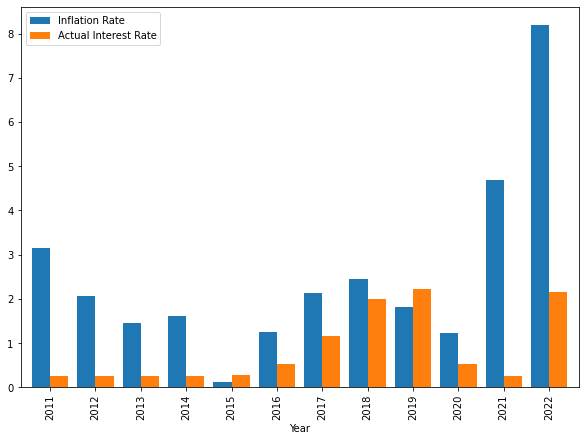

In [50]:
Inflation_vs_Interest.plot.bar(x='Year',y=['Inflation Rate','Actual Interest Rate'],figsize=(10,7),width=0.8)
plt.savefig("Output\Inflation_vs_Interest.png")

# Observations

Government  increase the interest rate to flight the increased inflation rate 
After analyzing the data we have seen the same is reflecting in the bar chart. 
We have also seen that 3 to 5% inflation rate reconsidered under contorted and no adjustment of interest rate for that period. 

During the time of lockdown and covid the interest rate was reduced to boost the economy 


# House mortgage

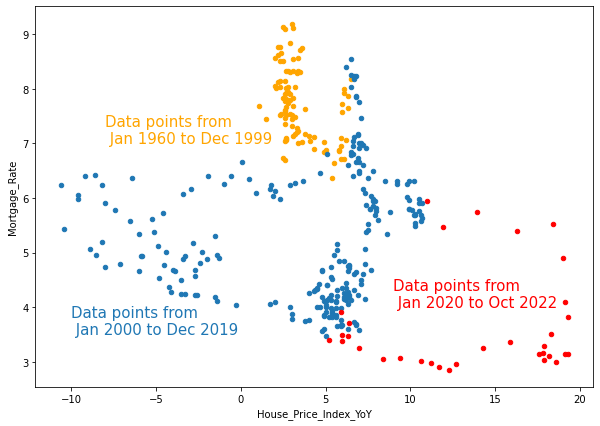

In [51]:
house_inf = Dataset[["Year","Month","House_Price_Index_YoY","Mortgage_Rate"]]
house_inf.dropna(how='any',inplace=True)
house_inf.drop_duplicates(subset=['Year','Month','House_Price_Index_YoY','Mortgage_Rate'])

list_help=[]
for whatever in house_inf["Mortgage_Rate"]:
    list_help.append(whatever)
house_inf["Mortgage_Rate"] = list_help
house_inf.drop_duplicates(subset=['Year','Month'],inplace=True)
ancient = house_inf.loc[house_inf['Year']<2000,:]
new = house_inf.loc[(house_inf['Year']>=2000) & (house_inf['Year']<2020) ,:]
recently = house_inf.loc[house_inf['Year']>=2020,:]
ax = ancient.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',c='orange',figsize=(10,7))
new.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',ax=ax)
recently.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',c='red',ax=ax)
plt.annotate("Data points from\n Jan 1960 to Dec 1999",(-8,7),color='orange',fontsize=15)
plt.annotate("Data points from\n Jan 2000 to Dec 2019",(-10,3.5),color='#1f77b4',fontsize=15)
plt.annotate("Data points from\n Jan 2020 to Oct 2022",(9,4),color='red',fontsize=15)
plt.savefig("Output\Inflation_vs_Mortgage_Rate.png")

# Observations

The House Price Index (HPI) is a broad measure of the movement of single-family house prices in the United States.
If the mortgage rate is higher there will be a decline of house price/index and vice versa
We have seen the same trend of the index from 2000 to 2022


#  Inflation vs. Buy to Rent Ratio

In [52]:
Buy_to_Rent_Ratio = Buy_to_Rent_Ratio[["DateTime","Value"]]
Buy_to_Rent_Ratio["Year"] = pd.DatetimeIndex(Buy_to_Rent_Ratio["DateTime"]).year 
Buy_to_Rent_Ratio["Month"] = pd.DatetimeIndex(Buy_to_Rent_Ratio["DateTime"]).month
Buy_to_Rent_Ratio.rename(columns = {'Value':"Buy_to_Rent_Ratio"},inplace=True)
Buy_to_Rent_Ratio = Buy_to_Rent_Ratio[["Year","Month","Buy_to_Rent_Ratio"]]
Buy_to_Rent_Ratio

,Year,Month,Buy_to_Rent_Ratio
0,1970,3,93.5525
1,1970,6,91.9308
2,1970,9,92.0048
3,1970,12,91.9977
4,1971,3,93.5979
5,1971,6,96.1677
6,1971,9,95.8795
7,1971,12,97.4696
8,1972,3,95.9344
9,1972,6,97.7476


In [53]:
mor_rate = Dataset[['Year','Month','Mortgage_Rate']]
Mortgage_vs_BuytoRent = pd.merge(mor_rate,Buy_to_Rent_Ratio,how='outer',on=['Year','Month'])
Mortgage_vs_BuytoRent.dropna(how='any',inplace=True)
Mortgage_vs_BuytoRent = Mortgage_vs_BuytoRent.groupby('Year')[["Mortgage_Rate","Buy_to_Rent_Ratio"]].mean().reset_index()


In [54]:
mor_list = []
for i in Mortgage_vs_BuytoRent["Mortgage_Rate"]:
    mor_list.append(i)
mor_chg_list = []
for j in range(len(mor_list)-1):
    mor_chg_list.append(((mor_list[j+1]/mor_list[j])-1)*100)
mor_chg_list.append(mor_chg_list[len(mor_chg_list)-1])


buyrent_list = []
for k in Mortgage_vs_BuytoRent["Buy_to_Rent_Ratio"]:
    buyrent_list.append(k)
buyrent_chg_list = []
for l in range(len(buyrent_list)-1):
    buyrent_chg_list.append(((buyrent_list[l+1]/buyrent_list[l])-1)*100)  
buyrent_chg_list.append(buyrent_chg_list[len(buyrent_chg_list)-1])


Mortgage_vs_BuytoRent['Mortgage Rate Change (%)'] = mor_chg_list  
Mortgage_vs_BuytoRent['B to R ratio Change (%)'] = buyrent_chg_list 

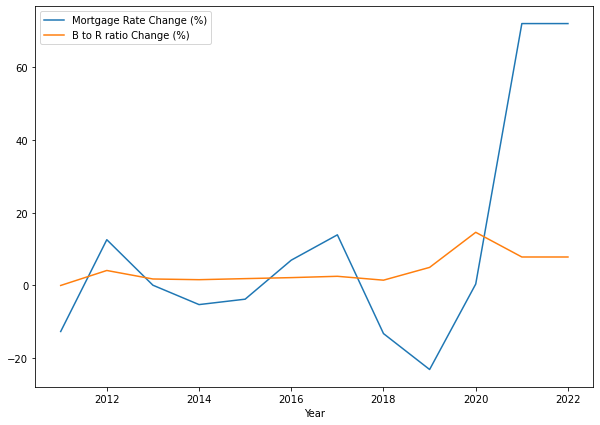

In [55]:
more_recent = Mortgage_vs_BuytoRent.loc[Mortgage_vs_BuytoRent['Year']>2010,:]
axx = more_recent.plot(x='Year',y='Mortgage Rate Change (%)',figsize=(10,7))
more_recent.plot(x='Year',y='B to R ratio Change (%)',ax=axx)
plt.savefig("Output\Mortgage_vs_BuytoRent.png")

# Observations

The buy-to-rent ratio shows whether buying or renting would be best for a particular property in a given market.
The Higher the Ratio is it’s better to rent than Buy
After Analyzing the data we have seen the relation with them as when the mortgage rate is high the Buy to Rent ratio also gone up

